In [295]:
#importing modules 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('./habermans-survival-data-set/haberman.csv')

In [296]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [297]:
df.columns

Index(['30', '64', '1', '1.1'], dtype='object')

### Attribute Information:

* 30 - Age of patient at time of operation (numerical)
* 64 - Patient's year of operation (year - 1900, numerical)
* 1  - Number of positive axillary nodes detected (numerical)
* 1.1 - Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year


#### OBSERVATION :
* 1. No. of features are 3 i.e '30','64','1'.
* 2. label- '1.1'

In [298]:
df.columns=['age','year_of_operation','axillary_nodes','survival_status']

In [299]:
df=df.sort_values('age',axis=0)
df.head()

,age,year_of_operation,axillary_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [300]:
df['survival_status'].unique() 

array([1, 2], dtype=int64)

#### OBJECTIVE  -  
* It has finite number of classes .So it is ***Binary classification*** problem


In [301]:
df['survival_status'].replace(1,'survived',inplace=True)
df['survival_status'].replace(2,'not_survived',inplace=True)

In [302]:
df.head()

,age,year_of_operation,axillary_nodes,survival_status
0,30,62,3,survived
1,30,65,0,survived
2,31,59,2,survived
3,31,65,4,survived
4,33,58,10,survived


In [303]:
df.shape

(305, 4)

In [304]:
df['survival_status'].value_counts() 

survived        224
not_survived     81
Name: survival_status, dtype: int64

#### OBSERVATION : 
* Imbalanced dataset 
* 224 people Survived from 305.
* 81 people non survived from 305.

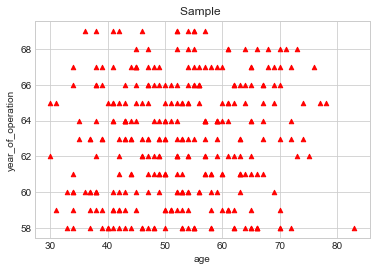

In [305]:
df.plot(kind='scatter',x='age',y='year_of_operation',color='red',marker='^')
plt.title('Sample ')
plt.show()


#### OBSERVATION :
**No information found**

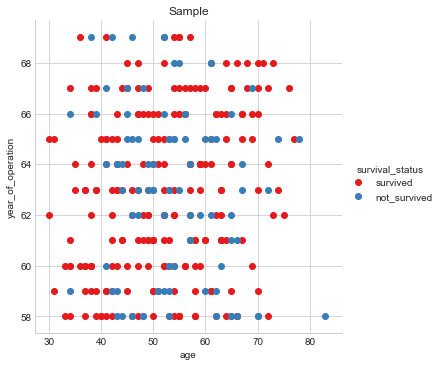

In [306]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='survival_status',size=5,palette='Set1')\
   .map(plt.scatter,'age','year_of_operation')\
   .add_legend()
   
plt.title('Sample')
plt.show();

#### OBSERVATION : 
* NO information Found. Randomly distributed

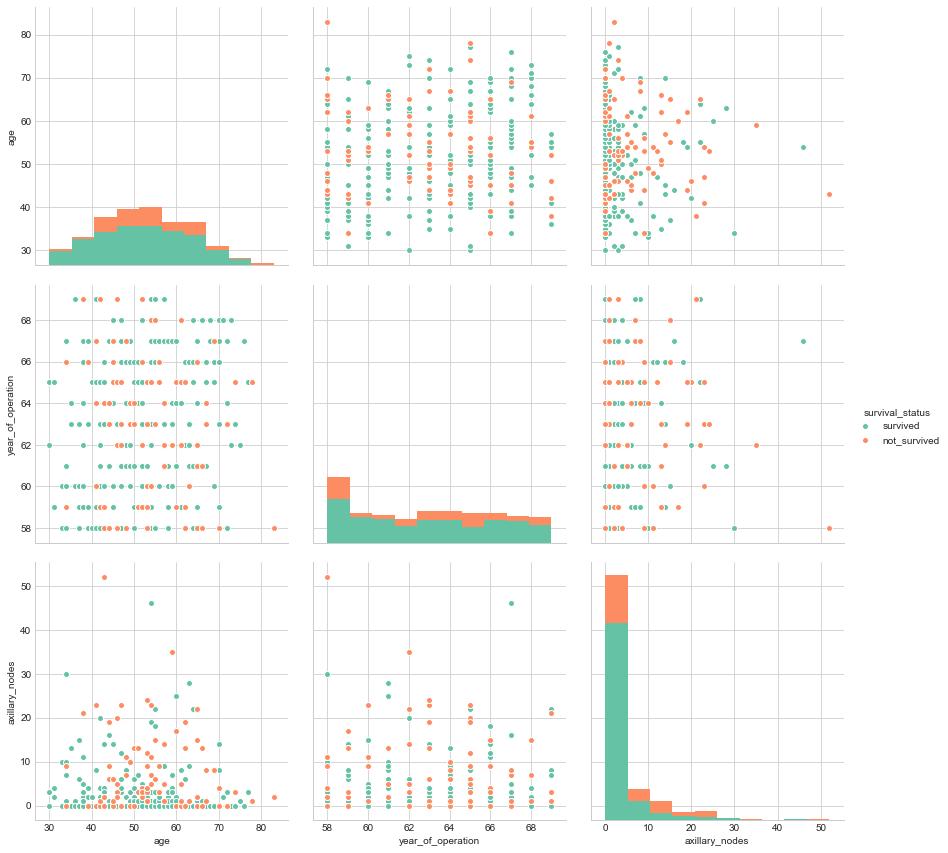

In [307]:
sns.set_style('whitegrid')
sns.pairplot(df,hue='survival_status',size=4,palette='Set2')
plt.show()

#### OBSERVATION : 
* All plots are very complex.
* No information found

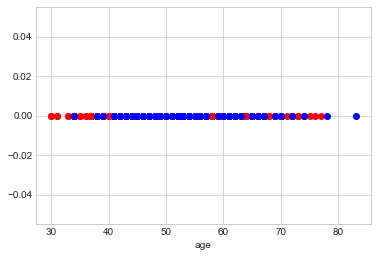

In [308]:
survived=df[df['survival_status']=='survived']
not_survived=df[df['survival_status']=='not_survived']

r=plt.plot(survived['age'],np.zeros_like(survived['age']),'ro')
s=plt.plot(not_survived['age'],np.zeros_like(not_survived['age']),'bo')
plt.xlabel('age')
plt.show();

#### OBSERVATION : 
* Overlapping is there .No information found in age feature

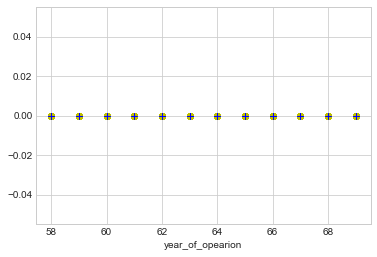

In [309]:
plt.plot(survived['year_of_operation'],np.zeros_like(survived['year_of_operation']),'yo')
plt.plot(not_survived['year_of_operation'],np.zeros_like(not_survived['year_of_operation']),'b+');
plt.xlabel('year_of_opearion')
plt.show();

#### OBSERVATION : 
* Overlapping is there .No information found in year of operation feature
* Data is of 1958 to 1969

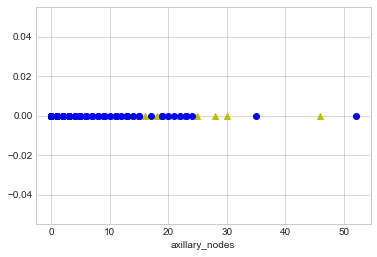

In [310]:
plt.plot(survived['axillary_nodes'],np.zeros_like(survived['axillary_nodes']),'y^')
plt.plot(not_survived['axillary_nodes'],np.zeros_like(not_survived['axillary_nodes']),'bo')
plt.xlabel('axillary_nodes')
plt.show();

In [311]:
import warnings
warnings.filterwarnings('ignore')

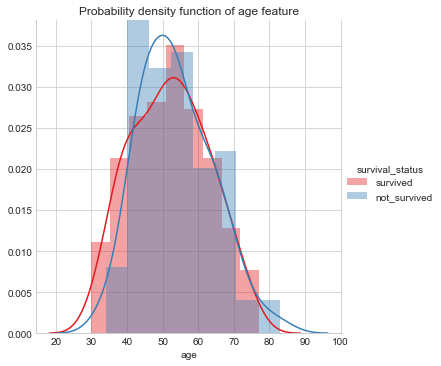

In [312]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='survival_status',size=5,palette='Set1')\
    .map(sns.distplot,'age')\
    .add_legend();
plt.xlabel('age') 
plt.title('Probability density function of age feature')
plt.show();



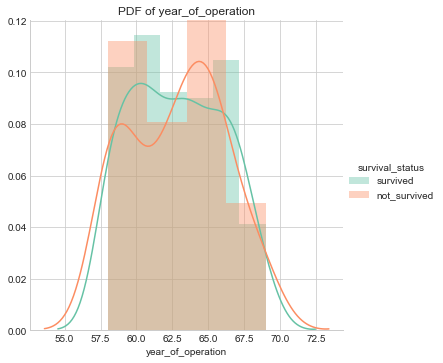

In [313]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='survival_status',size=5,palette='Set2')\
    .map(sns.distplot,'year_of_operation')\
    .add_legend();
plt.title('PDF of year_of_operation')    
plt.show();

### OBSERVATION : 
* Overlapping is there

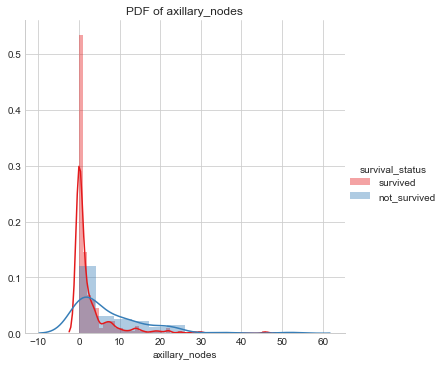

In [314]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='survival_status',size=5,palette='Set1')\
    .map(sns.distplot,'axillary_nodes')\
    .add_legend();
plt.title('PDF of axillary_nodes')    
plt.show()

In [332]:
df['survival_status'][df['axillary_nodes']==0][df['survival_status']=='survived'].count()

117

In [333]:
df['survival_status'][df['axillary_nodes']==0][df['survival_status']=='not_survived'].count()

19

#### OBSERVATION:
* when axillary nodes are equal to zero 116 survived  for more than 5 years and 19 survived within 5 years.. 

* Therefore axillary nodes are less more are the chances of survival

In [ ]:
counts,bin_edges=np.histogram(df['axillary_nodes'],density=True,bins=10)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF',color='r',marker='o')
plt.plot(bin_edges[1:],cdf,label='CDF',color='g',marker='o')
plt.legend()
plt.xlabel('axillary_nodes')
plt.title('PDF and CDF representation on whole data')
plt.show();

#### OBSERVATION:

* There are almost 80% data points which have axillary nodes <= 4

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


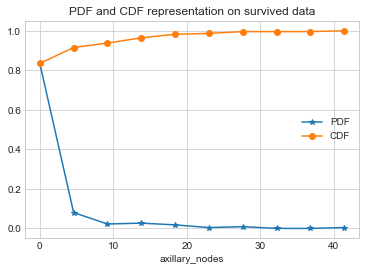

In [316]:
counts,bin_edges=np.histogram(df['axillary_nodes'][df['survival_status']=='survived'],density=True,)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[:-1],pdf,label='PDF',marker='*')
plt.plot(bin_edges[:-1],cdf,label='CDF',marker='o')
plt.xlabel('axillary_nodes')
plt.title('PDF and CDF representation on survived data')
plt.legend()
plt.show();

#### OBSERVATION :

* Almost 95% data points from survived data set only having axillary nodes <=10
     So there are more chances of survival when axillary nodes <=10

* Approx 82 % from survived list survived when axillary nodes = 0.


[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


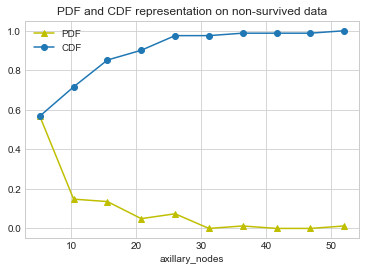

In [317]:
counts,bin_edges=np.histogram(df['axillary_nodes'][df['survival_status']=='not_survived'],density=True,bins=10)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF',color='y',marker='^')
plt.plot(bin_edges[1:],cdf,label='CDF',marker='o')
plt.xlabel('axillary_nodes')
plt.xlabel('axillary_nodes')
plt.title('PDF and CDF representation on non-survived data')
plt.legend()
plt.show();

In [318]:
df[df['axillary_nodes']<0].count()

age                  0
year_of_operation    0
axillary_nodes       0
survival_status      0
dtype: int64

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


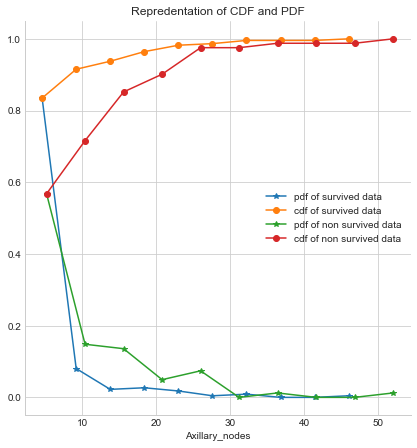

In [319]:
sns.FacetGrid(df,size=6)
counts,bin_edges=np.histogram(df['axillary_nodes'][df['survival_status']=='survived'],density=True,bins=10)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf of survived data',marker='*')
plt.plot(bin_edges[1:],cdf,label='cdf of survived data',marker='o')

counts,bin_edges=np.histogram(df['axillary_nodes'][df['survival_status']=='not_survived'],density=True,bins=10)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf of non survived data',marker='*')
plt.plot(bin_edges[1:],cdf,label='cdf of non survived data',marker='o')
plt.legend()
plt.title('Repredentation of CDF and PDF')
plt.xlabel('Axillary_nodes')
plt.show()

In [320]:
df[df['axillary_nodes']==0][df['survival_status']=='survived'].count()

age                  117
year_of_operation    117
axillary_nodes       117
survival_status      117
dtype: int64

#### OBSERVATION : 

*  At axil nodes = 0 only 19 persons  non survived  from 81 (non- survivied) list . i.e less than 24% non survived when axillary nodes =0.


*  At axil nodes = 0 117 people survived from 224  (survivied list) i.e greater than 50% survived when axillary nodes=0.

In [321]:
# Mean , Variance ,Std - deviation 
print('Means:')
print(np.mean(survived['axillary_nodes']))
print(np.mean(not_survived['axillary_nodes']))

print('\nStd-deviation:')
print(np.std(survived['axillary_nodes']))
print(np.std(not_survived['axillary_nodes']))


Means:
2.799107142857143
7.45679012345679

Std-deviation:
5.869092706952768
9.128776076761632


In [322]:
print('Means:')
print(np.mean(survived['age']))
print(np.mean(not_survived['age']))

print('\nStd-deviation:')
print(np.std(survived['age']))
print(np.std(not_survived['age']))


Means:
52.11607142857143
53.67901234567901

Std-deviation:
10.913004640364269
10.10418219303131


In [323]:
print('Means:')
print(np.mean(survived['year_of_operation']))
print(np.mean(not_survived['year_of_operation']))

print('\nStd-deviation:')
print(np.std(survived['year_of_operation']))
print(np.std(not_survived['year_of_operation']))


Means:
62.857142857142854
62.82716049382716

Std-deviation:
3.2220145175061514
3.3214236255207883


In [324]:
# median , Percentiles , Quantiles, IQR ,MAD
print('\n Medians: ')
print(np.median(survived['axillary_nodes']))
print(np.median(not_survived['axillary_nodes']))

print('\n Quantitles:')
print(np.percentile(survived['axillary_nodes'],np.arange(0,100,25)))
print(np.percentile(not_survived['axillary_nodes'],np.arange(0,100,25)))

from statsmodels import robust
print('\n MAD:')
print(robust.mad(survived['axillary_nodes']))
print(robust.mad(not_survived['axillary_nodes']))



 Medians: 
0.0
4.0

 Quantitles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

 MAD:
0.0
5.930408874022408


#### OBSERVATION :
* Median of survived list is 0. Therfore , more chances of survival when axil nodes = 0

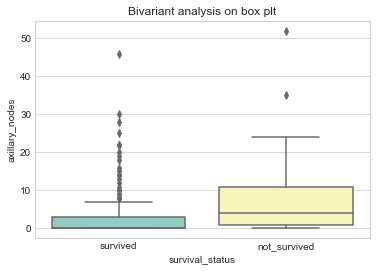

In [325]:
sns.boxplot(data=df,x='survival_status',y='axillary_nodes',palette='Set3')
plt.title('Bivariant analysis on box plt')
plt.show()


#### OBSERVATION : 
* Again, more chances of survival when axillary nodes = 0.

Text(0.5,1,'Representaion of box plt')

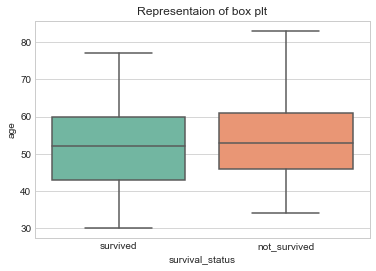

In [326]:
sns.boxplot(data=df,x='survival_status',y='age',palette='Set2')
plt.title('Representaion of box plt')

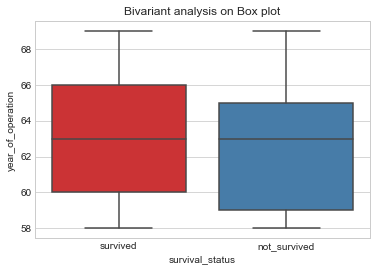

In [327]:
sns.boxplot(data=df,x='survival_status',y='year_of_operation',palette='Set1')
plt.title('Bivariant analysis on Box plot')
plt.show()

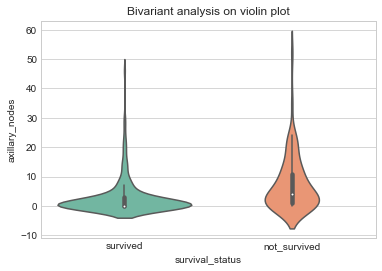

In [328]:
# Violin Plots
sns.violinplot(data=df,x='survival_status',y='axillary_nodes',palette='Set2')
plt.title('Bivariant analysis on violin plot')
plt.show()

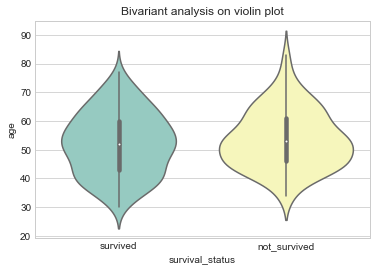

In [329]:
sns.violinplot(data=df,x='survival_status',y='age',palette='Set3')
plt.title('Bivariant analysis on violin plot')
plt.show();

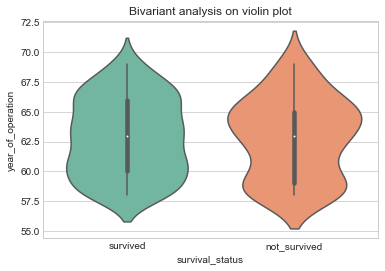

In [330]:
sns.violinplot(data=df,x='survival_status',y='year_of_operation',palette='Set2')
plt.title('Bivariant analysis on violin plot')
plt.show()

#### OBSERVATION : 
* No information Found in violin plots.